# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 4:
Samples: 10000
Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Example of Image 9:
Image - Min Value: 22 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


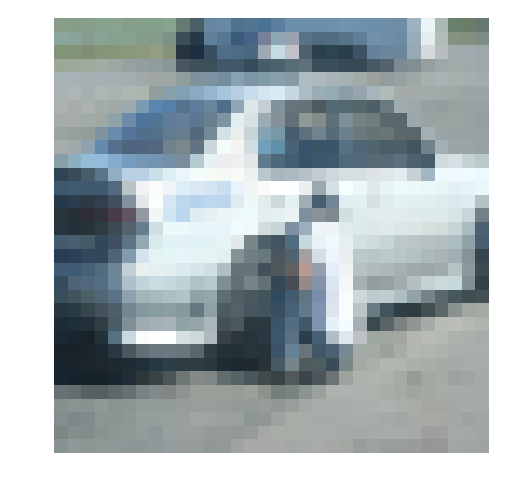

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 4
sample_id = 9
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    
    # Initializing normalization vector
    norm_vec = np.zeros(x.shape)
    
    # TODO: Implement Function
    norm_vec = (x - x.min())/(x.max() - x.min())
    return norm_vec


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # Initializing one hot vector
    x_dim       = len(x)
    n_labels    = 10 # 0 - 9
    one_hot_vec = np.zeros((x_dim, n_labels))
    
    for idx in range(x_dim):
        one_hot_vec[idx, x[idx]] = 1
    
    
    # TODO: Implement Function
    return one_hot_vec


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    
    image_input = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), name="x")
    
    # TODO: Implement Function
    return image_input


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    
    label_input = tf.placeholder(tf.float32, (None, n_classes), name = "y")
    
    # TODO: Implement Function
    return label_input


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    dropout_prob = tf.placeholder(tf.float32, name="keep_prob")
    
    return dropout_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    print(conv_num_outputs)
    # Initializing weights and biases
    weights = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1], x_tensor.get_shape().as_list()[3], conv_num_outputs],
                                               stddev =0.05))
    bias    = tf.Variable(tf.truncated_normal([conv_num_outputs]))
    
    # Convolutional layer
    conv_layer = tf.nn.conv2d(x_tensor, weights, strides=[1, conv_strides[0], conv_strides[1], 1], padding = 'SAME')
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    # Max Pooling
    conv_layer = tf.nn.max_pool(conv_layer, 
                                ksize  = [1, pool_ksize[0], pool_ksize[1], 1],
                                strides = [1, pool_strides[0], pool_strides[1], 1],
                                padding = 'SAME' )
    
    
    # TODO: Implement Function
    return conv_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

10
Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # Flattened Image Size
    flat_size = x_tensor.get_shape()[1:4].num_elements()
    
    # Flattened Image with tf.reshape 
    flat_image = tf.reshape(x_tensor,[-1, flat_size])
    
    # TODO: Implement Function
    return flat_image


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    
    # Initializing weights and biases
    weights_shape = (x_tensor.get_shape().as_list()[1], num_outputs)
    weights = tf.Variable(tf.truncated_normal(weights_shape, stddev = 0.05))
    bias = tf.Variable(tf.truncated_normal([num_outputs]))
    
    # Fully connected layer
    fc_layer = tf.add(tf.matmul(x_tensor, weights), bias)
    fc_layer = tf.nn.relu(fc_layer)
    
    
    # TODO: Implement Function
    return fc_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function

    # Initializing weights and biases
    weights_shape = (x_tensor.get_shape().as_list()[1], num_outputs)
    weights = tf.Variable(tf.truncated_normal(weights_shape, stddev = 0.05))
    bias = tf.Variable(tf.zeros(num_outputs))
    
    
    # Ouput layer with no softmax
    output_layer = tf.add(tf.matmul(x_tensor, weights), bias)
    
    
    return output_layer



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Convolutional Layer 1
    conv1_outputs = 16
    conv1_ksize   = (5,5)
    conv1_strides = (1,1)
    pool1_ksize   = (2,2)
    pool1_strides = (2,2)
    
    
    conv1_layer = conv2d_maxpool(x, conv1_outputs, conv1_ksize, conv1_strides, pool1_ksize, pool1_strides)
    
    # Convolutional Layer 2
    conv2_outputs = 34
    conv2_ksize   = (3,3)
    conv2_strides = (1,1)
    pool2_ksize   = (2,2)
    pool2_strides = (2,2)
    
    conv2_layer = conv2d_maxpool(conv1_layer, conv2_outputs, conv2_ksize, conv2_strides, pool2_ksize, pool2_strides)
    
    # Convolutional Layer 3
    # conv3_outputs = 100
    # conv3_ksize   = (2,2)
    # conv3_strides = (1,1)
    # pool3_ksize   = (2,2)
    # pool3_strides = (2,2)
    
    # conv3_layer = conv2d_maxpool(conv2_layer, conv3_outputs, conv3_ksize, conv3_strides, pool3_ksize, pool3_strides)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten layer
    flatten_layer = flatten(conv2_layer)
    #print(flatten_layer)
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1
    fc1_outputs = 128
    fc1_layer   = fully_conn(flatten_layer, fc1_outputs)
    fc1_layer   = tf.nn.dropout(fc1_layer, keep_prob)
    
    # Fully Connected Layer 2
    fc2_outputs = 64
    fc2_layer   = fully_conn(fc1_layer, fc2_outputs)
    fc2_layer   = tf.nn.dropout(fc2_layer, keep_prob)
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer
    n_classes = 10
    logits_layer = output(fc2_layer, n_classes)
    
    #print (output_layer.get_shape())

    # TODO: return output
    return logits_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

16
34
16
34
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    
    # TODO: Implement Function
    optimizer_dictionary ={x: feature_batch, y: label_batch, keep_prob: keep_probability}
    session.run(optimizer, feed_dict = optimizer_dictionary)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    # Validation loss calculation
    cost_dict = {x: feature_batch, y: label_batch, keep_prob: 1.0}
    loss      = session.run(cost, cost_dict)
    
    
    # Validation accuracy calculation
    acc_dict  = {x: valid_features, y: valid_labels, keep_prob: 1.0}
    acc       = session.run(accuracy, acc_dict)
    print ('\n Validation loss: {0: .5f}, Validation accuracy: {1: .2%} '.format(loss, acc))
    

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [17]:
# TODO: Tune Parameters
epochs = 250
batch_size = 256
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  
 Validation loss:  2.29566, Validation accuracy:  13.76% 
Epoch  2, CIFAR-10 Batch 1:  
 Validation loss:  2.23677, Validation accuracy:  18.44% 
Epoch  3, CIFAR-10 Batch 1:  
 Validation loss:  2.16557, Validation accuracy:  23.96% 
Epoch  4, CIFAR-10 Batch 1:  
 Validation loss:  2.13354, Validation accuracy:  25.58% 
Epoch  5, CIFAR-10 Batch 1:  
 Validation loss:  2.13488, Validation accuracy:  26.28% 
Epoch  6, CIFAR-10 Batch 1:  
 Validation loss:  2.13014, Validation accuracy:  27.30% 
Epoch  7, CIFAR-10 Batch 1:  
 Validation loss:  2.10502, Validation accuracy:  26.84% 
Epoch  8, CIFAR-10 Batch 1:  
 Validation loss:  2.11982, Validation accuracy:  27.94% 
Epoch  9, CIFAR-10 Batch 1:  
 Validation loss:  2.11685, Validation accuracy:  29.90% 
Epoch 10, CIFAR-10 Batch 1:  
 Validation loss:  2.08102, Validation accuracy:  30.98% 
Epoch 11, CIFAR-10 Batch 1:  
 Validation loss:  2.01846, Validation accuracy

 Validation loss:  0.27367, Validation accuracy:  51.32% 
Epoch 186, CIFAR-10 Batch 1:  
 Validation loss:  0.27864, Validation accuracy:  51.48% 
Epoch 187, CIFAR-10 Batch 1:  
 Validation loss:  0.26797, Validation accuracy:  51.56% 
Epoch 188, CIFAR-10 Batch 1:  
 Validation loss:  0.28155, Validation accuracy:  51.64% 
Epoch 189, CIFAR-10 Batch 1:  
 Validation loss:  0.27773, Validation accuracy:  51.84% 
Epoch 190, CIFAR-10 Batch 1:  
 Validation loss:  0.26369, Validation accuracy:  51.78% 
Epoch 191, CIFAR-10 Batch 1:  
 Validation loss:  0.25682, Validation accuracy:  51.30% 
Epoch 192, CIFAR-10 Batch 1:  
 Validation loss:  0.25363, Validation accuracy:  51.30% 
Epoch 193, CIFAR-10 Batch 1:  
 Validation loss:  0.26929, Validation accuracy:  51.38% 
Epoch 194, CIFAR-10 Batch 1:  
 Validation loss:  0.29131, Validation accuracy:  51.70% 
Epoch 195, CIFAR-10 Batch 1:  
 Validation loss:  0.26920, Validation accuracy:  51.72% 
Epoch 196, CIFAR-10 Batch 1:  
 Validation loss:  0.

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  
 Validation loss:  2.29883, Validation accuracy:  10.08% 
Epoch  1, CIFAR-10 Batch 2:  
 Validation loss:  2.26640, Validation accuracy:  17.66% 
Epoch  1, CIFAR-10 Batch 3:  
 Validation loss:  1.97523, Validation accuracy:  21.74% 
Epoch  1, CIFAR-10 Batch 4:  
 Validation loss:  2.04035, Validation accuracy:  25.26% 
Epoch  1, CIFAR-10 Batch 5:  
 Validation loss:  2.07704, Validation accuracy:  26.38% 
Epoch  2, CIFAR-10 Batch 1:  
 Validation loss:  2.17931, Validation accuracy:  29.02% 
Epoch  2, CIFAR-10 Batch 2:  
 Validation loss:  2.01000, Validation accuracy:  31.82% 
Epoch  2, CIFAR-10 Batch 3:  
 Validation loss:  1.67938, Validation accuracy:  34.58% 
Epoch  2, CIFAR-10 Batch 4:  
 Validation loss:  1.75082, Validation accuracy:  36.10% 
Epoch  2, CIFAR-10 Batch 5:  
 Validation loss:  1.85660, Validation accuracy:  36.66% 
Epoch  3, CIFAR-10 Batch 1:  
 Validation loss:  1.94223, Validation accuracy:  36.74% 
Epoch  3, CIFAR-10 B

 Validation loss:  0.81036, Validation accuracy:  56.48% 
Epoch 19, CIFAR-10 Batch 4:  
 Validation loss:  0.92211, Validation accuracy:  56.64% 
Epoch 19, CIFAR-10 Batch 5:  
 Validation loss:  0.92739, Validation accuracy:  56.76% 
Epoch 20, CIFAR-10 Batch 1:  
 Validation loss:  1.01274, Validation accuracy:  56.56% 
Epoch 20, CIFAR-10 Batch 2:  
 Validation loss:  0.87234, Validation accuracy:  57.12% 
Epoch 20, CIFAR-10 Batch 3:  
 Validation loss:  0.81456, Validation accuracy:  56.24% 
Epoch 20, CIFAR-10 Batch 4:  
 Validation loss:  0.91664, Validation accuracy:  57.16% 
Epoch 20, CIFAR-10 Batch 5:  
 Validation loss:  0.89277, Validation accuracy:  57.08% 
Epoch 21, CIFAR-10 Batch 1:  
 Validation loss:  0.96570, Validation accuracy:  55.84% 
Epoch 21, CIFAR-10 Batch 2:  
 Validation loss:  0.87011, Validation accuracy:  57.44% 
Epoch 21, CIFAR-10 Batch 3:  
 Validation loss:  0.78340, Validation accuracy:  57.64% 
Epoch 21, CIFAR-10 Batch 4:  
 Validation loss:  0.87456, Vali

 Validation loss:  0.67062, Validation accuracy:  60.50% 
Epoch 38, CIFAR-10 Batch 2:  
 Validation loss:  0.60697, Validation accuracy:  60.26% 
Epoch 38, CIFAR-10 Batch 3:  
 Validation loss:  0.53653, Validation accuracy:  61.44% 
Epoch 38, CIFAR-10 Batch 4:  
 Validation loss:  0.64914, Validation accuracy:  61.38% 
Epoch 38, CIFAR-10 Batch 5:  
 Validation loss:  0.65222, Validation accuracy:  60.96% 
Epoch 39, CIFAR-10 Batch 1:  
 Validation loss:  0.65308, Validation accuracy:  61.44% 
Epoch 39, CIFAR-10 Batch 2:  
 Validation loss:  0.57593, Validation accuracy:  59.32% 
Epoch 39, CIFAR-10 Batch 3:  
 Validation loss:  0.52258, Validation accuracy:  61.66% 
Epoch 39, CIFAR-10 Batch 4:  
 Validation loss:  0.61436, Validation accuracy:  61.18% 
Epoch 39, CIFAR-10 Batch 5:  
 Validation loss:  0.61150, Validation accuracy:  61.00% 
Epoch 40, CIFAR-10 Batch 1:  
 Validation loss:  0.67204, Validation accuracy:  61.18% 
Epoch 40, CIFAR-10 Batch 2:  
 Validation loss:  0.55497, Vali

 Validation loss:  0.47212, Validation accuracy:  62.20% 
Epoch 56, CIFAR-10 Batch 5:  
 Validation loss:  0.42967, Validation accuracy:  62.44% 
Epoch 57, CIFAR-10 Batch 1:  
 Validation loss:  0.49060, Validation accuracy:  61.82% 
Epoch 57, CIFAR-10 Batch 2:  
 Validation loss:  0.44228, Validation accuracy:  61.46% 
Epoch 57, CIFAR-10 Batch 3:  
 Validation loss:  0.40156, Validation accuracy:  62.08% 
Epoch 57, CIFAR-10 Batch 4:  
 Validation loss:  0.45927, Validation accuracy:  62.74% 
Epoch 57, CIFAR-10 Batch 5:  
 Validation loss:  0.44857, Validation accuracy:  62.42% 
Epoch 58, CIFAR-10 Batch 1:  
 Validation loss:  0.48659, Validation accuracy:  62.28% 
Epoch 58, CIFAR-10 Batch 2:  
 Validation loss:  0.42142, Validation accuracy:  61.78% 
Epoch 58, CIFAR-10 Batch 3:  
 Validation loss:  0.36218, Validation accuracy:  62.46% 
Epoch 58, CIFAR-10 Batch 4:  
 Validation loss:  0.44749, Validation accuracy:  62.22% 
Epoch 58, CIFAR-10 Batch 5:  
 Validation loss:  0.45832, Vali

 Validation loss:  0.36765, Validation accuracy:  62.32% 
Epoch 75, CIFAR-10 Batch 3:  
 Validation loss:  0.34451, Validation accuracy:  61.76% 
Epoch 75, CIFAR-10 Batch 4:  
 Validation loss:  0.41012, Validation accuracy:  62.16% 
Epoch 75, CIFAR-10 Batch 5:  
 Validation loss:  0.36803, Validation accuracy:  62.04% 
Epoch 76, CIFAR-10 Batch 1:  
 Validation loss:  0.41082, Validation accuracy:  61.84% 
Epoch 76, CIFAR-10 Batch 2:  
 Validation loss:  0.34773, Validation accuracy:  62.56% 
Epoch 76, CIFAR-10 Batch 3:  
 Validation loss:  0.33493, Validation accuracy:  62.40% 
Epoch 76, CIFAR-10 Batch 4:  
 Validation loss:  0.37744, Validation accuracy:  62.24% 
Epoch 76, CIFAR-10 Batch 5:  
 Validation loss:  0.35053, Validation accuracy:  61.92% 
Epoch 77, CIFAR-10 Batch 1:  
 Validation loss:  0.41394, Validation accuracy:  62.42% 
Epoch 77, CIFAR-10 Batch 2:  
 Validation loss:  0.35424, Validation accuracy:  60.80% 
Epoch 77, CIFAR-10 Batch 3:  
 Validation loss:  0.32190, Vali

 Validation loss:  0.28576, Validation accuracy:  62.94% 
Epoch 94, CIFAR-10 Batch 1:  
 Validation loss:  0.36102, Validation accuracy:  63.00% 
Epoch 94, CIFAR-10 Batch 2:  
 Validation loss:  0.30990, Validation accuracy:  62.50% 
Epoch 94, CIFAR-10 Batch 3:  
 Validation loss:  0.26746, Validation accuracy:  62.36% 
Epoch 94, CIFAR-10 Batch 4:  
 Validation loss:  0.33122, Validation accuracy:  62.88% 
Epoch 94, CIFAR-10 Batch 5:  
 Validation loss:  0.29209, Validation accuracy:  62.64% 
Epoch 95, CIFAR-10 Batch 1:  
 Validation loss:  0.36325, Validation accuracy:  62.28% 
Epoch 95, CIFAR-10 Batch 2:  
 Validation loss:  0.32810, Validation accuracy:  61.76% 
Epoch 95, CIFAR-10 Batch 3:  
 Validation loss:  0.31781, Validation accuracy:  62.34% 
Epoch 95, CIFAR-10 Batch 4:  
 Validation loss:  0.34539, Validation accuracy:  63.22% 
Epoch 95, CIFAR-10 Batch 5:  
 Validation loss:  0.27452, Validation accuracy:  62.66% 
Epoch 96, CIFAR-10 Batch 1:  
 Validation loss:  0.37458, Vali

 Validation loss:  0.24962, Validation accuracy:  63.62% 
Epoch 112, CIFAR-10 Batch 3:  
 Validation loss:  0.26467, Validation accuracy:  63.30% 
Epoch 112, CIFAR-10 Batch 4:  
 Validation loss:  0.28984, Validation accuracy:  63.48% 
Epoch 112, CIFAR-10 Batch 5:  
 Validation loss:  0.25038, Validation accuracy:  63.36% 
Epoch 113, CIFAR-10 Batch 1:  
 Validation loss:  0.34010, Validation accuracy:  63.02% 
Epoch 113, CIFAR-10 Batch 2:  
 Validation loss:  0.24295, Validation accuracy:  63.32% 
Epoch 113, CIFAR-10 Batch 3:  
 Validation loss:  0.25520, Validation accuracy:  63.46% 
Epoch 113, CIFAR-10 Batch 4:  
 Validation loss:  0.28377, Validation accuracy:  62.22% 
Epoch 113, CIFAR-10 Batch 5:  
 Validation loss:  0.25430, Validation accuracy:  62.82% 
Epoch 114, CIFAR-10 Batch 1:  
 Validation loss:  0.29853, Validation accuracy:  63.14% 
Epoch 114, CIFAR-10 Batch 2:  
 Validation loss:  0.28166, Validation accuracy:  62.26% 
Epoch 114, CIFAR-10 Batch 3:  
 Validation loss:  0.

 Validation loss:  0.25814, Validation accuracy:  62.54% 
Epoch 130, CIFAR-10 Batch 5:  
 Validation loss:  0.23308, Validation accuracy:  62.42% 
Epoch 131, CIFAR-10 Batch 1:  
 Validation loss:  0.27521, Validation accuracy:  62.70% 
Epoch 131, CIFAR-10 Batch 2:  
 Validation loss:  0.30308, Validation accuracy:  63.38% 
Epoch 131, CIFAR-10 Batch 3:  
 Validation loss:  0.20998, Validation accuracy:  63.06% 
Epoch 131, CIFAR-10 Batch 4:  
 Validation loss:  0.25298, Validation accuracy:  63.42% 
Epoch 131, CIFAR-10 Batch 5:  
 Validation loss:  0.22667, Validation accuracy:  62.70% 
Epoch 132, CIFAR-10 Batch 1:  
 Validation loss:  0.32172, Validation accuracy:  61.84% 
Epoch 132, CIFAR-10 Batch 2:  
 Validation loss:  0.31601, Validation accuracy:  62.84% 
Epoch 132, CIFAR-10 Batch 3:  
 Validation loss:  0.20601, Validation accuracy:  63.44% 
Epoch 132, CIFAR-10 Batch 4:  
 Validation loss:  0.26458, Validation accuracy:  62.88% 
Epoch 132, CIFAR-10 Batch 5:  
 Validation loss:  0.

 Validation loss:  0.33475, Validation accuracy:  63.14% 
Epoch 149, CIFAR-10 Batch 2:  
 Validation loss:  0.24900, Validation accuracy:  62.92% 
Epoch 149, CIFAR-10 Batch 3:  
 Validation loss:  0.18080, Validation accuracy:  62.62% 
Epoch 149, CIFAR-10 Batch 4:  
 Validation loss:  0.22473, Validation accuracy:  63.02% 
Epoch 149, CIFAR-10 Batch 5:  
 Validation loss:  0.20667, Validation accuracy:  62.78% 
Epoch 150, CIFAR-10 Batch 1:  
 Validation loss:  0.29555, Validation accuracy:  62.98% 
Epoch 150, CIFAR-10 Batch 2:  
 Validation loss:  0.26035, Validation accuracy:  62.74% 
Epoch 150, CIFAR-10 Batch 3:  
 Validation loss:  0.18051, Validation accuracy:  62.98% 
Epoch 150, CIFAR-10 Batch 4:  
 Validation loss:  0.22879, Validation accuracy:  62.86% 
Epoch 150, CIFAR-10 Batch 5:  
 Validation loss:  0.20338, Validation accuracy:  62.88% 
Epoch 151, CIFAR-10 Batch 1:  
 Validation loss:  0.29542, Validation accuracy:  62.62% 
Epoch 151, CIFAR-10 Batch 2:  
 Validation loss:  0.

 Validation loss:  0.17982, Validation accuracy:  62.44% 
Epoch 167, CIFAR-10 Batch 4:  
 Validation loss:  0.21673, Validation accuracy:  63.10% 
Epoch 167, CIFAR-10 Batch 5:  
 Validation loss:  0.18172, Validation accuracy:  63.22% 
Epoch 168, CIFAR-10 Batch 1:  
 Validation loss:  0.26351, Validation accuracy:  62.56% 
Epoch 168, CIFAR-10 Batch 2:  
 Validation loss:  0.23053, Validation accuracy:  62.98% 
Epoch 168, CIFAR-10 Batch 3:  
 Validation loss:  0.17330, Validation accuracy:  62.80% 
Epoch 168, CIFAR-10 Batch 4:  
 Validation loss:  0.21726, Validation accuracy:  63.36% 
Epoch 168, CIFAR-10 Batch 5:  
 Validation loss:  0.18228, Validation accuracy:  62.90% 
Epoch 169, CIFAR-10 Batch 1:  
 Validation loss:  0.25844, Validation accuracy:  62.48% 
Epoch 169, CIFAR-10 Batch 2:  
 Validation loss:  0.21506, Validation accuracy:  62.98% 
Epoch 169, CIFAR-10 Batch 3:  
 Validation loss:  0.16166, Validation accuracy:  62.32% 
Epoch 169, CIFAR-10 Batch 4:  
 Validation loss:  0.

 Validation loss:  0.16140, Validation accuracy:  62.66% 
Epoch 186, CIFAR-10 Batch 1:  
 Validation loss:  0.25790, Validation accuracy:  63.04% 
Epoch 186, CIFAR-10 Batch 2:  
 Validation loss:  0.19492, Validation accuracy:  63.12% 
Epoch 186, CIFAR-10 Batch 3:  
 Validation loss:  0.15907, Validation accuracy:  62.42% 
Epoch 186, CIFAR-10 Batch 4:  
 Validation loss:  0.18297, Validation accuracy:  63.70% 
Epoch 186, CIFAR-10 Batch 5:  
 Validation loss:  0.17024, Validation accuracy:  63.42% 
Epoch 187, CIFAR-10 Batch 1:  
 Validation loss:  0.25321, Validation accuracy:  63.26% 
Epoch 187, CIFAR-10 Batch 2:  
 Validation loss:  0.19239, Validation accuracy:  63.32% 
Epoch 187, CIFAR-10 Batch 3:  
 Validation loss:  0.14241, Validation accuracy:  62.60% 
Epoch 187, CIFAR-10 Batch 4:  
 Validation loss:  0.17384, Validation accuracy:  63.48% 
Epoch 187, CIFAR-10 Batch 5:  
 Validation loss:  0.19301, Validation accuracy:  63.10% 
Epoch 188, CIFAR-10 Batch 1:  
 Validation loss:  0.

 Validation loss:  0.18150, Validation accuracy:  62.80% 
Epoch 204, CIFAR-10 Batch 3:  
 Validation loss:  0.12609, Validation accuracy:  62.24% 
Epoch 204, CIFAR-10 Batch 4:  
 Validation loss:  0.17537, Validation accuracy:  63.28% 
Epoch 204, CIFAR-10 Batch 5:  
 Validation loss:  0.16406, Validation accuracy:  63.18% 
Epoch 205, CIFAR-10 Batch 1:  
 Validation loss:  0.22082, Validation accuracy:  63.18% 
Epoch 205, CIFAR-10 Batch 2:  
 Validation loss:  0.17749, Validation accuracy:  62.92% 
Epoch 205, CIFAR-10 Batch 3:  
 Validation loss:  0.13005, Validation accuracy:  63.60% 
Epoch 205, CIFAR-10 Batch 4:  
 Validation loss:  0.15270, Validation accuracy:  63.02% 
Epoch 205, CIFAR-10 Batch 5:  
 Validation loss:  0.14241, Validation accuracy:  63.04% 
Epoch 206, CIFAR-10 Batch 1:  
 Validation loss:  0.19627, Validation accuracy:  62.94% 
Epoch 206, CIFAR-10 Batch 2:  
 Validation loss:  0.19950, Validation accuracy:  63.10% 
Epoch 206, CIFAR-10 Batch 3:  
 Validation loss:  0.

 Validation loss:  0.17869, Validation accuracy:  63.06% 
Epoch 222, CIFAR-10 Batch 5:  
 Validation loss:  0.15787, Validation accuracy:  62.68% 
Epoch 223, CIFAR-10 Batch 1:  
 Validation loss:  0.20930, Validation accuracy:  62.82% 
Epoch 223, CIFAR-10 Batch 2:  
 Validation loss:  0.16826, Validation accuracy:  62.30% 
Epoch 223, CIFAR-10 Batch 3:  
 Validation loss:  0.10892, Validation accuracy:  62.76% 
Epoch 223, CIFAR-10 Batch 4:  
 Validation loss:  0.16501, Validation accuracy:  62.72% 
Epoch 223, CIFAR-10 Batch 5:  
 Validation loss:  0.14930, Validation accuracy:  62.96% 
Epoch 224, CIFAR-10 Batch 1:  
 Validation loss:  0.22995, Validation accuracy:  62.38% 
Epoch 224, CIFAR-10 Batch 2:  
 Validation loss:  0.20338, Validation accuracy:  62.22% 
Epoch 224, CIFAR-10 Batch 3:  
 Validation loss:  0.10646, Validation accuracy:  62.60% 
Epoch 224, CIFAR-10 Batch 4:  
 Validation loss:  0.15054, Validation accuracy:  62.74% 
Epoch 224, CIFAR-10 Batch 5:  
 Validation loss:  0.

 Validation loss:  0.21345, Validation accuracy:  63.48% 
Epoch 241, CIFAR-10 Batch 2:  
 Validation loss:  0.17833, Validation accuracy:  62.38% 
Epoch 241, CIFAR-10 Batch 3:  
 Validation loss:  0.11230, Validation accuracy:  61.24% 
Epoch 241, CIFAR-10 Batch 4:  
 Validation loss:  0.14782, Validation accuracy:  62.76% 
Epoch 241, CIFAR-10 Batch 5:  
 Validation loss:  0.15486, Validation accuracy:  62.38% 
Epoch 242, CIFAR-10 Batch 1:  
 Validation loss:  0.22939, Validation accuracy:  62.44% 
Epoch 242, CIFAR-10 Batch 2:  
 Validation loss:  0.14542, Validation accuracy:  62.36% 
Epoch 242, CIFAR-10 Batch 3:  
 Validation loss:  0.09967, Validation accuracy:  61.78% 
Epoch 242, CIFAR-10 Batch 4:  
 Validation loss:  0.16018, Validation accuracy:  62.64% 
Epoch 242, CIFAR-10 Batch 5:  
 Validation loss:  0.14858, Validation accuracy:  62.90% 
Epoch 243, CIFAR-10 Batch 1:  
 Validation loss:  0.22107, Validation accuracy:  63.32% 
Epoch 243, CIFAR-10 Batch 2:  
 Validation loss:  0.

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6291015625



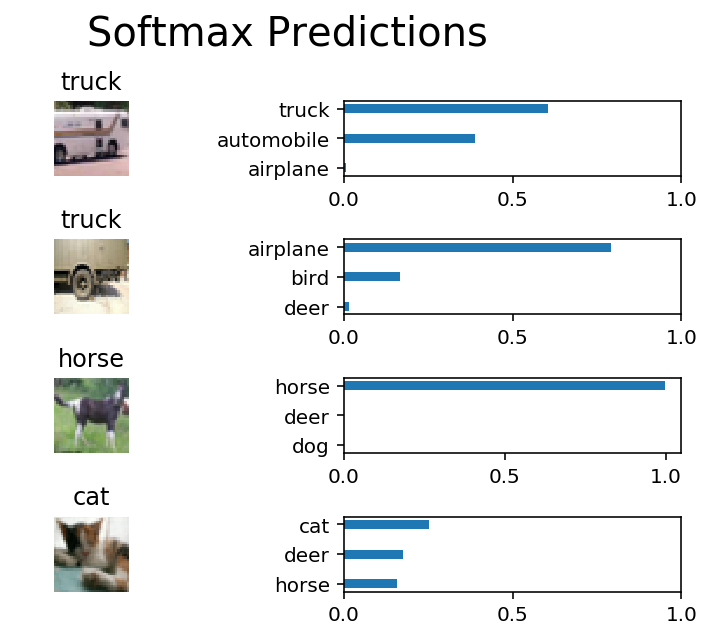

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.